In [2]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In a dataframe named "king_county_df" load "kc_house_data.csv" file in the cell below using "pd.read_csv" format

In [3]:
file_path = "C:/Users/MARY/Desktop/Phase_2/Phase-2-Group-17-Project/data/kc_house_data.csv"

king_county_df = pd.read_csv(file_path)
king_county_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/MARY/Desktop/Phase_2/Phase-2-Group-17-Project/data/kc_house_data.csv'

In [ ]:
# Understanding our columns
king_county_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

Now lets get familiar with the data we have in our king_county_df. This step will include
1. Understanding the dimentionality of our dataset
2. Investigating what type of data it contains, and the data types used to store it
3. Dicovering how missing values are encoded, and how many there are
4. Getting a feel for what information it does and doesn't contain

In the cell below,lets inspect the overall shape of the dataframe

Let's look at the shape printout:

In [ ]:
#Checking data shape
king_county_df.shape

(21597, 21)

# Interpretation

**Number of Rows (21597):**

This indicates we have 21,597 records or observations in our dataset. Each row provides information about a specific house sale in King County.

**Number of Columns (21):**

This indicates we have 21 different variables or features for each house sale. These variables contain information that can be used for analysis, such as numerical data (e.g., price, area sizes) and categorical data (e.g., waterfront status, condition).

**Let's look at the info printout:**

In [ ]:
#Checking dataframe info
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In the cell below, interpret that information. Do the data types line up with what we expect? Are there any missing values?

In [ ]:
"""
The data types seem to line up with what we expect. The columns
containing strings are type object, whereas the columns containing
decimal numbers and full numbers are type float64 and int64 respectively.

Some columns have missing values, notably waterfront, view, and yr_renovated. Additionally, 
sqft_basement is stored as an object type, which might need conversion to a numerical type for analysis.
"""

'\nThe data types seem to line up with what we expect. The columns\ncontaining strings are type object, whereas the columns containing\ndecimal numbers and full numbers are type float64 and int64 respectively.\n\nSome columns have missing values, notably waterfront, view, and yr_renovated. Additionally, \nsqft_basement is stored as an object type, which might need conversion to a numerical type for analysis.\n'

**Checking for missing values**

In [ ]:
king_county_df.isna().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Data Cleaning Steps

1.Convert date column to datetime format.

2.Convert sqft_basement column to numeric format.

**date: We convert this column to datetime format using pd.to_datetime.**

In [ ]:
#conversion of date to dtype datetime to confirm timeframe of dataset
date_df=pd.to_datetime(king_county_df["date"])
date_df

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [ ]:
# Timestamp of the dataframe
date_df.min(),date_df.max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

This signifies that our dataset  ranges from period starting on May 2, 2014, and ending on May 27, 2015. 

**sqft_basement: We convert this column to numeric using pd.to_numeric. Setting errors='coerce' ensures that any non-numeric values are converted to NaN.**

In [ ]:
king_county_df['sqft_basement'] = pd.to_numeric(king_county_df['sqft_basement'], errors='coerce')


# Handling Missing values

 We decided to use imputation instead of dropping columns with missing values. Dropping columns with missing data can lead to a significant loss of valuable information,especially if the columns are important predictors. Imputation allows us to retain these columns and make use of the available data. Also if we drop columns with missing values, we might also end up dropping rows where those columns have missing values. This can reduce the sample size,potentially weakening the statistical power of our analysis and making our model less robust.

**waterfront: Since it's a categorical variable(likely binary), we impute missing values with 0 assuming houses without waterfront.**

We check value counts for waterfront column

In [ ]:
king_county_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [ ]:
# Impute 'waterfront' with 0 if missing
king_county_df['waterfront'].fillna(0, inplace=True)

**view: We impute missing values with the median view score, assuming a central tendency measure.**

In [ ]:
# Impute 'view' with median value
median_view = king_county_df['view'].median()
king_county_df['view'].fillna(median_view, inplace=True)

**yr_renovated: We impute missing values with 0 assuming no renovation year recorded.**


We define a function that will help us determine the   percentage of missing data

In [ ]:
# Function to calculate percentage of missing data in a column
def missing_data(df, column):
    length_of_df=len(df)                                                    
    missing_data= column.isna().sum()                                       
    percentage_of_missing_data = round((missing_data/length_of_df*100),2)   
    return print(f"Percentage of Missing Data: {percentage_of_missing_data}""%")

In [ ]:
# percentage of missing data
missing_data(king_county_df,king_county_df["yr_renovated"])

Percentage of Missing Data: 17.79%


We have 17.79% of missing data for the Year renovated column.

We now replace missing values with a default value that makes sense in the context. For yr_renovated, this could be 0 (indicating no renovation).

In [ ]:
# Impute 'yr_renovated' with 0 if missing
king_county_df['yr_renovated'].fillna(0, inplace=True)

**sqft_basement: After conversion, we check and fill any remaining NaNs with 0.**

In [ ]:
# Verify if 'sqft_basement' has any remaining NaNs after conversion and fill them with 0
king_county_df['sqft_basement'].fillna(0, inplace=True)

**Bedrooms: Checking value counts for bedrooms**

In [ ]:
# Checking the counts for each value in the column bedrooms
king_county_df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

From this we can conclude that majority of houses have less than 5 bedrooms 

Having  a house with 33 bedrooms might be impractical and not representative of typical data points. For this reason we are going to set an upper limit to ensure that the data remains realistic and relevant for practical applications, such as predicting average home prices.

In [ ]:
# Define a reasonable upper limit for bedrooms
upper_limit = 11

# Replace outliers with the upper limit or another strategy
king_county_df['bedrooms'] = king_county_df['bedrooms'].apply(lambda x: upper_limit if x > upper_limit else x)


**Rechecking our value count for bedrooms**

In [ ]:
# ReChecking the counts for each value in the column bedrooms
king_county_df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       2
Name: bedrooms, dtype: int64

In [ ]:
king_county_df['id'].value_counts()


795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

some houses seems like they were sold more than once between the 1 years timeframe 

In [ ]:
#checking for how many houses sold more than once 
sold_more_than_once = len(king_county_df) - len(king_county_df['id'].value_counts())
sold_more_than_once 

177

In [ ]:
king_county_df[king_county_df["id"]==795000620]

id        date     price  bedrooms  bathrooms  sqft_living  \
17588  795000620   9/24/2014  115000.0         3        1.0         1080   
17589  795000620  12/15/2014  124000.0         3        1.0         1080   
17590  795000620   3/11/2015  157000.0         3        1.0         1080   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
17588      6250     1.0         0.0   0.0  ...      5        1080   
17589      6250     1.0         0.0   0.0  ...      5        1080   
17590      6250     1.0         0.0   0.0  ...      5        1080   

       sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
17588            0.0      1950           0.0    98168  47.5045 -122.33   
17589            0.0      1950           0.0    98168  47.5045 -122.33   
17590            0.0      1950           0.0    98168  47.5045 -122.33   

       sqft_living15  sqft_lot15  
17588           1070        6250  
17589           1070        6250  
17590           1070        6250  

[3 rows x 21 columns]

# Verification:

**We check for any remaining missing values after these operations to ensure the dataset is clean.**

In [ ]:
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
# Check for any remaining missing values in the dataset
king_county_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No null values were found 

**Rechecking the dataset**

In [ ]:
king_county_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         0.0   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           0.0    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

# Summary Statistics

Let's generate summary statistics for numerical columns to understand the distribution of data. This will provide us with statistical information such as mean, standard deviation, minimum, maximum, and quartile values for numerical features.

In [ ]:
#Summary statistics for numerical columns
king_county_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.372181      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.905582      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.006760      0.233181      3.409825   
std    4.141264e+04      0.539683      0.081944      0.764673      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     285.716581   1970.999676     68.758207   
std        1.173200    827.759761     439.819830     29.375234    364.037499   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# Interpretation

**Central Tendency:** The mean and median prices provide measures of central tendency. The mean is influenced by extreme values (high-priced houses), while the median is less affected by outliers and represents the typical price of houses.

**Spread:** The standard deviation indicates the spread or variability of house prices. A higher standard deviation suggests a wider range of prices, indicating greater variability in housing costs.

**Distribution:** The quartiles (25th, 50th, and 75th percentiles) provide insights into the distribution of house prices. For example, the interquartile range (Q3 - Q1) gives a measure of the spread of the middle 50% of prices.

**Outliers:** The minimum and maximum values highlight the range of prices observed in the dataset, including any potential outliers (extremely low or high prices).

# Pair Plot

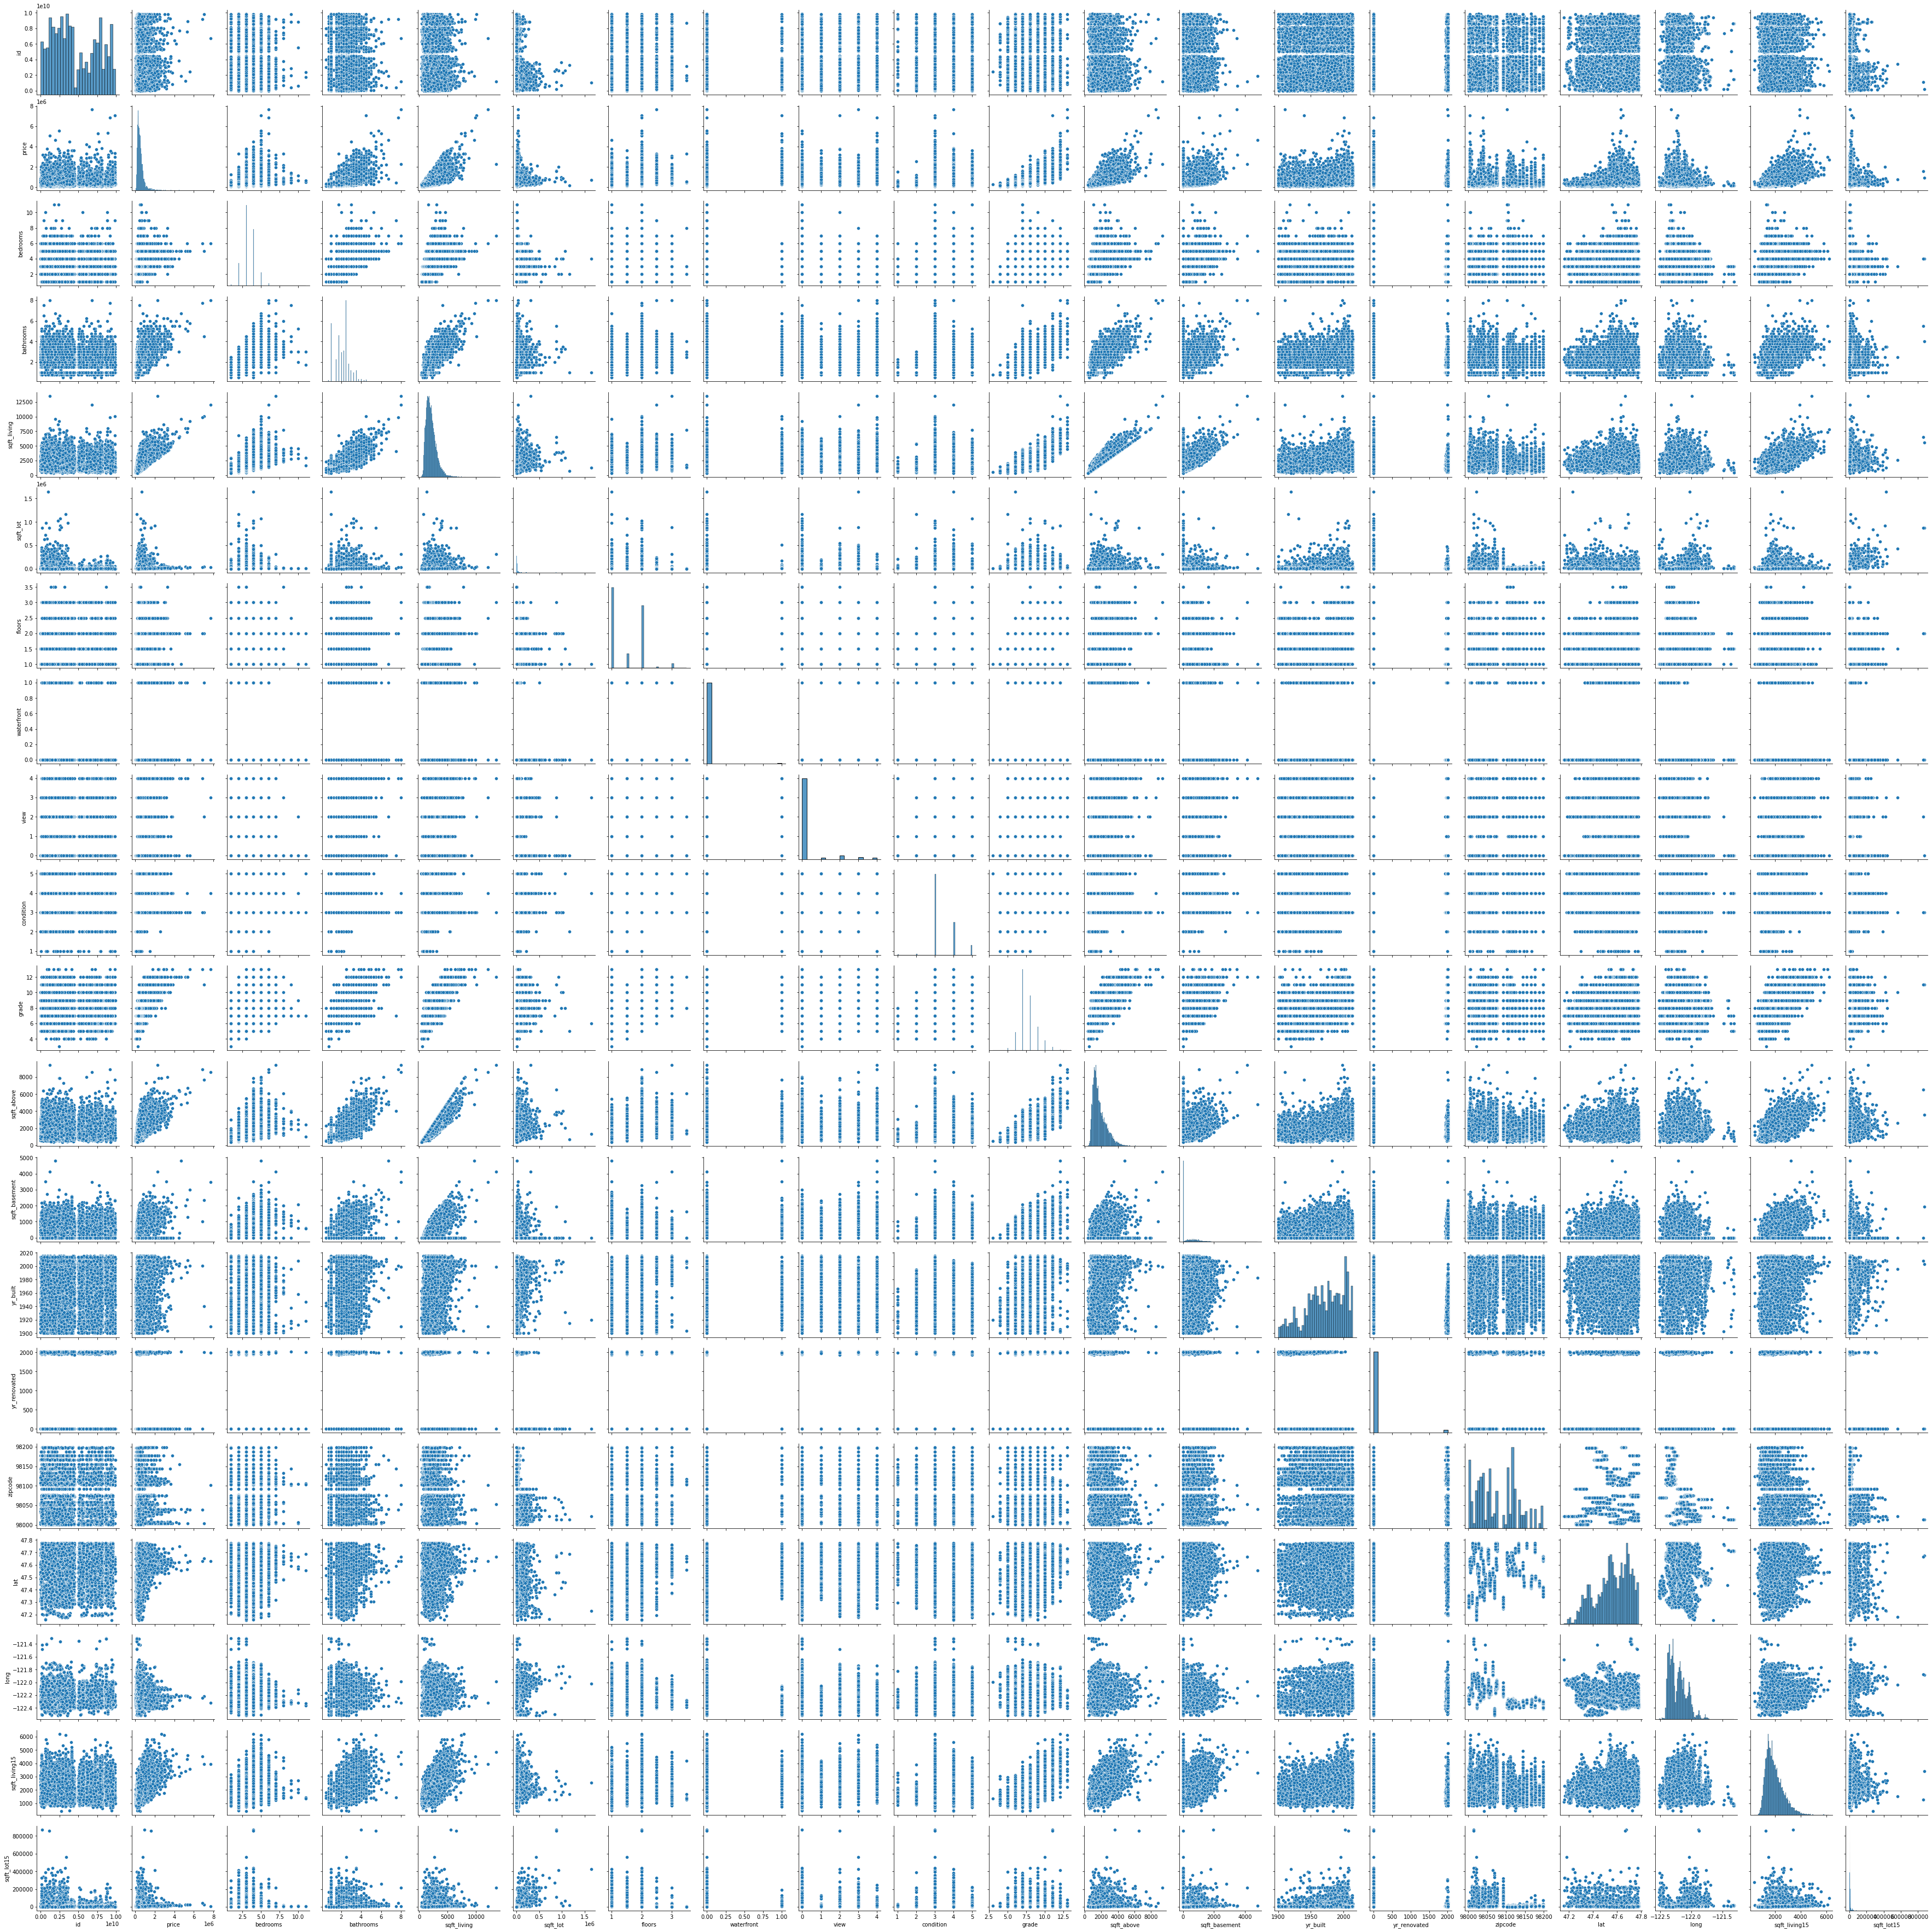

In [ ]:
# We generate a pair plot for the entire data set
sns.pairplot(data=king_county_df)

# Correlation Heat Map

Let's generate a correlation heat map to visualize the correlation between features.

This will help us understand which features have strong relationships with the target variable (price).

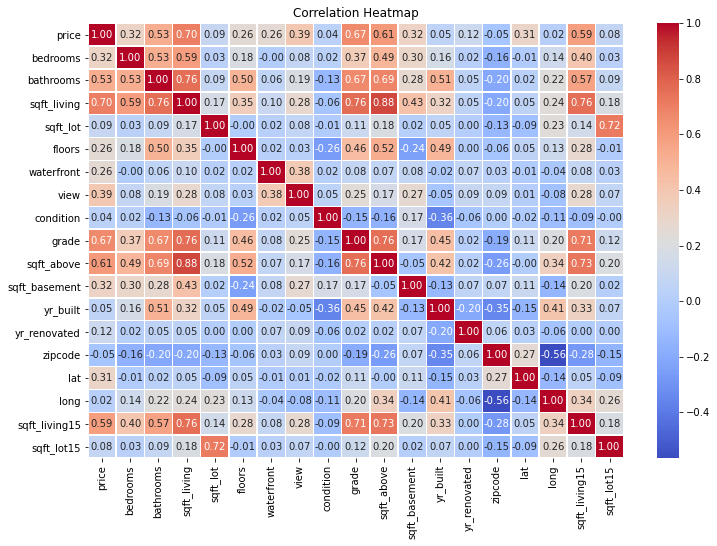

In [ ]:
# Drop the 'id' column
df = king_county_df.drop(columns=['id'])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix = king_county_df.corr()

price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlations)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.315546
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64


# Interpretation:
**Strong Positive Correlations (> 0.5):**

sqft_living (0.70), grade (0.67), sqft_above (0.61), bathrooms (0.53), sqft_living15 (0.59): These features have a strong positive correlation with price. This suggests that as these features increase (e.g., more square footage, higher grade), the house price tends to increase significantly.

**Moderate Positive Correlations (0.3 - 0.5):**

bedrooms (0.31), view (0.39), sqft_basement (0.32), floors (0.26), waterfront (0.26): These features also positively correlate with price, indicating that they contribute to higher house prices but to a lesser extent than the strongly correlated features.

**Weak Correlations (< 0.3):**

yr_renovated (0.12), condition (0.04), yr_built (0.05), sqft_lot15 (0.08), zipcode (-0.05), long (0.02): These features show weak correlations with price, suggesting that they have minimal impact on house prices or their impact is less direct.

**Negative Correlation (< 0):**

zipcode (-0.05): This indicates a very weak negative correlation with price, implying that house prices might be slightly lower in certain zip codes.

# Feature Selection

In [ ]:
# Select relevant features
df = king_county_df[['price','sqft_living', 'grade', 'sqft_above', 'bathrooms',
                       'bedrooms']]


Based on the correlation analysis and considering the goal of predicting house prices (price) in King County, here are the most important features we should consider:

**Primary Features:**

**sqft_living:** Square footage of the living area (Correlation: 0.70).

**grade:** Overall grade given to the housing unit (Correlation: 0.67).

**sqft_above:** Square footage of the house above ground level (Correlation: 0.61).

**bathrooms:** Number of bathrooms in the house (Correlation: 0.53).


**Additional Features:**

**bedrooms:** Number of bedrooms in the house (Correlation: 0.31).

# Why These Features?

**Strong Correlation:** These features exhibit the highest correlations with price based on our analysis, indicating a strong linear relationship with house prices in King County.

**Market Relevance:** Features like sqft_living, grade, and bathrooms are fundamental factors influencing property values, reflecting buyer preferences and market dynamics in the region.

**Predictive Power:** Models incorporating these features are likely to yield more accurate predictions of house prices due to their significant impact on property valuations.

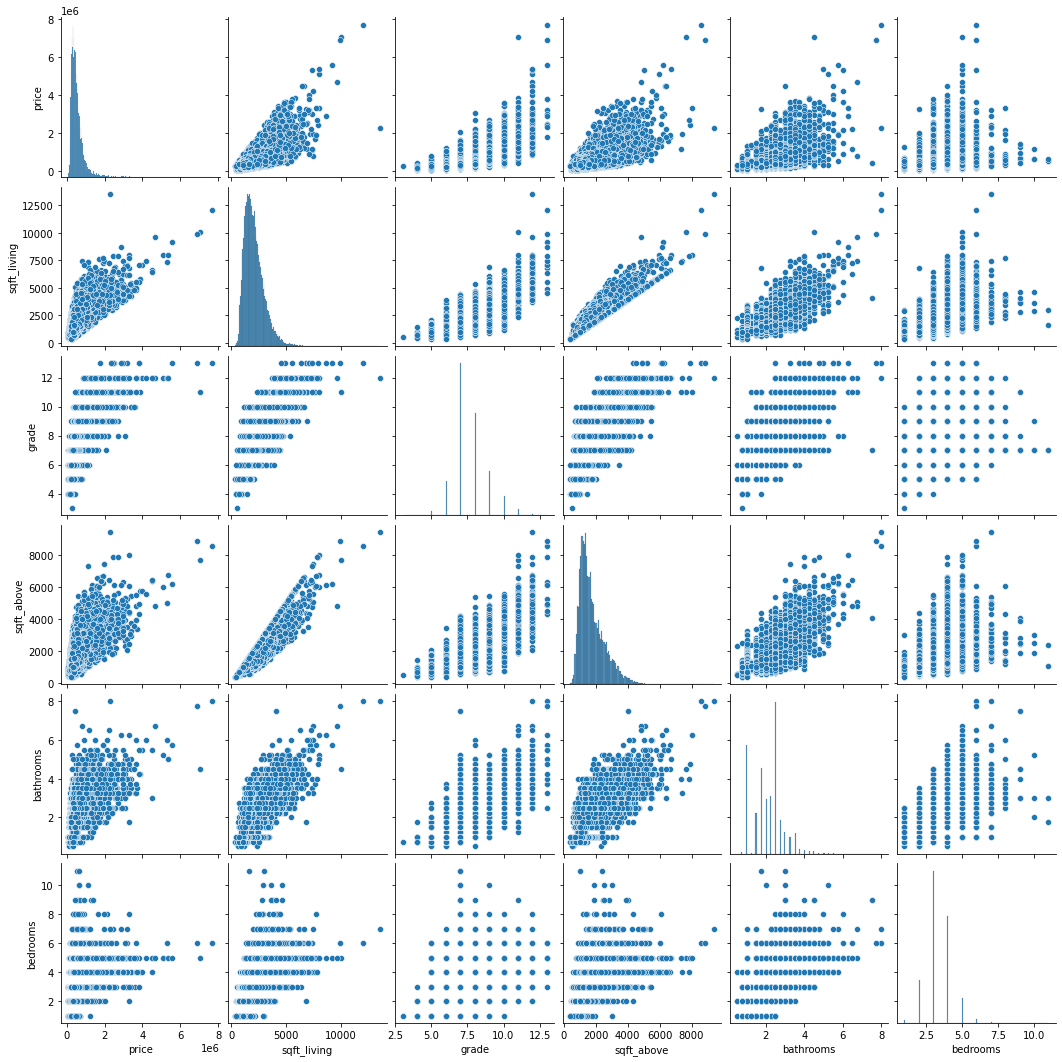

In [ ]:
# Pair plot of the selected features
sns.pairplot(data=df)

# Data Cleaning

**Checking for outliers**

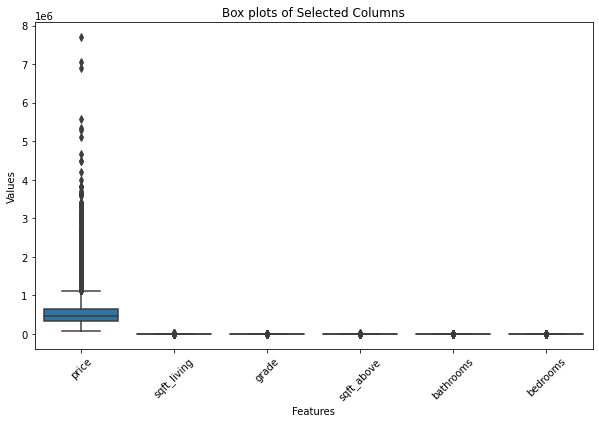

In [ ]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df3 = df[['sqft_above', 'sqft_living']]

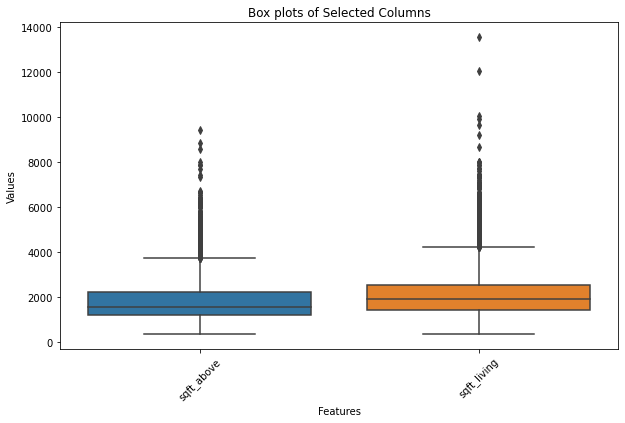

In [ ]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df4 = df[['bathrooms', 'bedrooms', 'grade']]

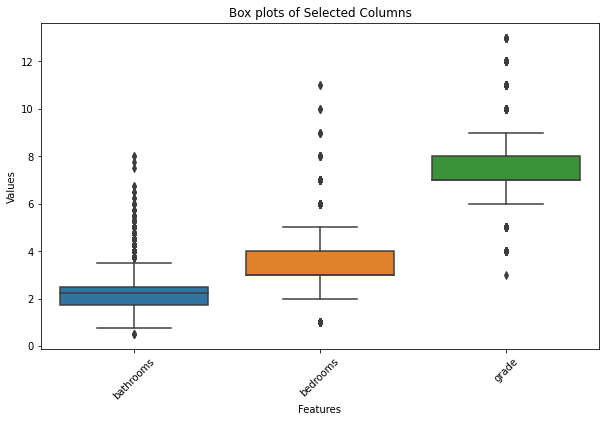

In [ ]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df4)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

from the above visualization outliers seem to be present.

# Get the Outliers 

In [ ]:
# Calculate IQR for selected columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]

print(f'Number of outliers: {len(outlier_indices)}')

Number of outliers: 2945


From the printout of numbers of outlier  we can see we have 2945 outlier present 

In [ ]:
# droping all columns with outliers 
#df = df.drop(outlier_indices)

In [ ]:
def replace_outliers_with_mean(df):
    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        outliers = (df[column] - mean).abs() > 3 * std
        df.loc[outliers, column] = mean
    return df

# Replace 'df' with your DataFrame
df = replace_outliers_with_mean(df)
print(df)

          price  sqft_living  grade  sqft_above  bathrooms  bedrooms
0      221900.0       1180.0    7.0      1180.0       1.00       3.0
1      538000.0       2570.0    7.0      2170.0       2.25       3.0
2      180000.0        770.0    6.0       770.0       1.00       2.0
3      604000.0       1960.0    7.0      1050.0       3.00       4.0
4      510000.0       1680.0    8.0      1680.0       2.00       3.0
...         ...          ...    ...         ...        ...       ...
21592  360000.0       1530.0    8.0      1530.0       2.50       3.0
21593  400000.0       2310.0    8.0      2310.0       2.50       4.0
21594  402101.0       1020.0    7.0      1020.0       0.75       2.0
21595  400000.0       1600.0    8.0      1600.0       2.50       3.0
21596  325000.0       1020.0    7.0      1020.0       0.75       2.0

[21597 rows x 6 columns]


c:\Users\MARY\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\Users\MARY\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\Users\MARY\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Data Analysis

**Analyse how does the square footage of the living area relate to price**

To understand the relationship between the square footage of the living area and the price, we can create a scatter plot. This will give us a visual representation of the data.


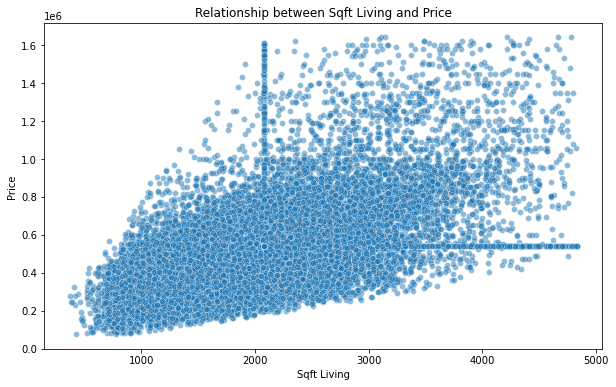

In [ ]:
# Visualize the relationship between sqft_living and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.title('Relationship between Sqft Living and Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

**Observation:**

 The scatter plot shows a clear positive relationship between sqft_living and price, indicating that larger living areas generally command higher prices.

**Implication:**

 This insight suggests that square footage is a significant factor in determining property prices in king house sales, which aligns with common expectations in real estate markets.

# Analysis 2

**Analyse The Impact of bathrooms to price**




          bathrooms         price
count  21597.000000  2.159700e+04
mean       2.091698  5.076360e+05
std        0.720923  2.570515e+05
min        0.500000  7.800000e+04
25%        1.750000  3.220000e+05
50%        2.250000  4.500000e+05
75%        2.500000  6.250000e+05
max        4.250000  1.640000e+06


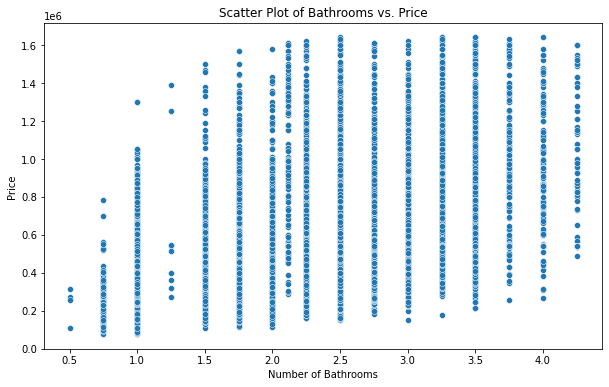

In [ ]:
# Exploratory Data Analysis
print(df[['bathrooms', 'price']].describe())

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['bathrooms'], y=df['price'])
plt.title('Scatter Plot of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

The scatter plot of bathrooms versus house prices shows a positive trend, indicating that houses with more bathrooms tend to have higher prices. However, the relationship may not be perfectly linear, suggesting the need for further analysis.

# Analysis 3

**Analyse The Impact of square footage of house apart from basement to price**




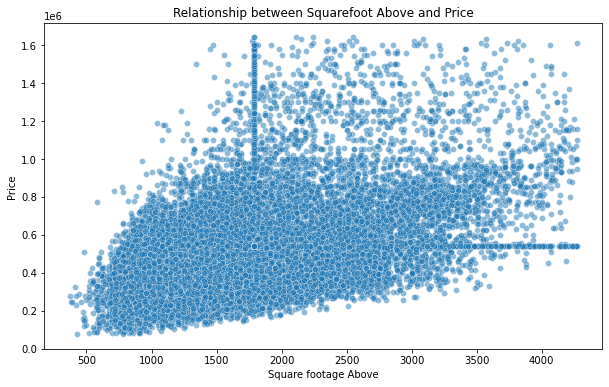

In [ ]:
# Scatter plot of Squarefoot Above vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_above', y='price', data=df, alpha=0.5)
plt.title('Relationship between Squarefoot Above and Price')
plt.xlabel('Square footage Above')
plt.ylabel('Price')
plt.show()

Properties with larger sqft_above generally tend to have higher prices. This suggests that above-ground living space significantly influences property values.


# Heat map for our Features

<AxesSubplot:>

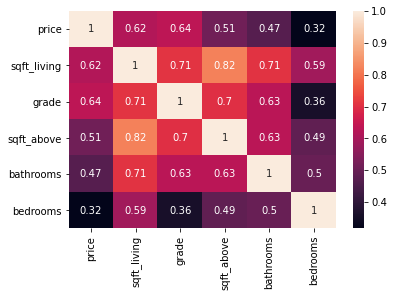

In [ ]:
sns.heatmap(data=df.corr(),annot=True)

**Develop a Multiple Regression Model for Predicting House Prices:** 

# Model 1

In [ ]:
 #Correlation
import statsmodels.api as sm
correlation = df['bathrooms'].corr(df['price'])
print(f'Correlation between bathrooms and price: {correlation}')

# Regression Analysis
X = df[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'bedrooms']]
y = df['price']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
print(model.summary())

Correlation between bathrooms and price: 0.4708999047837458
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     3795.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:23:53   Log-Likelihood:            -2.9287e+05
No. Observations:               21597   AIC:                         5.857e+05
Df Residuals:                   21591   BIC:                         5.858e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

**Correlation Analysis:**

The correlation coefficient between the number of bathrooms and house prices is approximately 0.471. This indicates a moderate positive relationship, meaning that as the number of bathrooms increases, house prices tend to increase as well.

**Regression Analysis:**

The overall model explains about 46.8% of the variance in house prices (R-squared = 0.468), which is quite substantial considering the complexity of housing markets.
The coefficient for bathrooms is approximately -9376.64, which is counterintuitive at first glance. However, the negative sign might suggest multicollinearity or that the relationship between bathrooms and price is not straightforward when other factors are considered.
Other significant predictors in the model include sqft_living, grade, sqft_above, and bedrooms. Each of these factors also significantly influences house prices, with sqft_living and grade showing particularly strong positive relationships.

In [ ]:
# Step 1: Prepare the data
X = df[['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms']]
y = df['price']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose a model (Linear Regression)
model = LinearRegression()

# Step 4: Train the model on the training data
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 34311913427.945812
R-squared: 0.47839866287224564


In [ ]:
x = df[['sqft_living', 'grade', 'sqft_above']]
y = df['price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a linear model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Prediction
y_pred = model.predict(X_test_scaled)

pred_df = pd.DataFrame({"true":y_test,"pred":y_pred})
pred_df.head()

true           pred
3686   132500.0  158815.822956
10247  415000.0  293592.608674
4037   494000.0  448515.851285
3437   355000.0  339526.221314
19291  606000.0  393958.603662

In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 61204919012.700676
Mean Absolute Error: 161005.30381084437
Root Mean Squared Error: 247396.27930245976
R-squared: 0.5299749082111846


# Model 2 

In [ ]:
df2=king_county_df[['sqft_living','grade','price','lat','long']]
df2.head()


sqft_living  grade     price      lat     long
0         1180      7  221900.0  47.5112 -122.257
1         2570      7  538000.0  47.7210 -122.319
2          770      6  180000.0  47.7379 -122.233
3         1960      7  604000.0  47.5208 -122.393
4         1680      8  510000.0  47.6168 -122.045

In [ ]:
# Separate features and target variable
X = df2[['sqft_living', 'grade', 'lat', 'long']]
y = df2['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

R-squared: 0.6056206029609058
Mean Absolute Error: 141954.27093865885
Coefficients: [ 2.01151721e+02  9.09388822e+04  6.10784490e+05 -3.30180839e+05]
Intercept: -69975811.35967253


# Interpretation of Results
**R-squared**

**R-squared: 0.6056:** This indicates that approximately 60.56% of the variance in housing prices can be explained by the model. This is a moderate level of explanatory power, suggesting that the selected features (sqft_living, grade, lat, long) are relevant predictors of housing prices but there are other factors influencing the prices not captured by this model.

**Coefficients**

**sqft_living (201.15):** For each additional square foot of living space, the price of the house is expected to increase by approximately $201.15, holding other factors constant.

**grade (90,938.88):** For each one-unit increase in the grade of the house, the price is expected to increase by about $90,938.88, holding other factors constant. The grade represents the overall 
quality and condition of the house.

**lat and long**

**lat (610,784.49):** Each one-degree increase in latitude is associated with an increase in house price by approximately $610,784.49, holding other factors constant. This high value suggests that latitude might be capturing location-related price variations, but it might be worthwhile to inspect if there are specific regions that drive this increase.

**long (-330,180.84):** Each one-degree increase in longitude is associated with a decrease in house price by approximately $330,180.84, holding other factors constant. Similar to latitude, this indicates location-based price differences.

**Intercept**

**Intercept (-69,975,811.36):** The intercept represents the expected value of the house price when all predictors are zero. While this value is not practically interpretable (since having zero for sqft_living, grade, lat, and long is not realistic), it serves as a baseline for the model.

**Mean Absolute Error (MAE)**

MAE: 141,954.27: On average, the predicted house prices differ from the actual prices by about $141,954.27. This gives an indication of the typical prediction error magnitude.

In [ ]:
df_transformed = df2.copy()

In [5]:
df_transformed['price_log'] = np.log(df_transformed['price'])

NameError: name 'df_transformed' is not defined

In [4]:
print(df_transformed.head())

NameError: name 'df_transformed' is not defined

Benefits of Log Transformation
Normalization: Log transformation often helps in stabilizing variance across different levels of the predictor variables.
Linear Relationships: It can make relationships between predictors and the target variable more linear, which is typically easier for regression models to handle.
Improved Model Performance: In some cases, transforming the target variable can lead to better model performance, especially when dealing with skewed data distributions or when the relationship between variables is complex.

In [ ]:
# Separate features and target variable
X = df_transformed[['sqft_living', 'lat', 'long']]
y = df_transformed['price_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

NameError: name 'df_transformed' is not defined

#
# Interpretation of Results

**R-squared**

**R-squared:** 0.7055: This indicates that approximately 70.55% of the variance in the logarithmically transformed house prices (price_log) can be explained by the model. This suggests an improvement in explanatory power compared to the previous model (R-squared of 0.6056), indicating that the selected features (sqft_living, grade, lat, long) are more effective predictors of the logarithmically transformed prices.

**Mean Absolute Error (MAE)**

**MAE: 0.2194:** This represents the average magnitude of the errors in predicting the logarithmically transformed prices. In this case, the MAE is 0.2194 units on the log scale, which corresponds to a more accurate prediction performance compared to the previous model's MAE of $141,954.27 in the original price scale.

**Coefficients**

**sqft_living (0.0002439):** For each additional unit increase in square footage of living space, the logarithm of the price is expected to increase by approximately 0.0002439 units, holding other factors constant.

**grade (0.1591):** Each one-unit increase in the grade of the house is associated with an increase in the logarithm of the price by about 0.1591 units, holding other factors constant.

**lat (1.4346):** Each one-degree increase in latitude is associated with an increase in the logarithm of the price by approximately 1.4346 units, holding other factors constant. This indicates that 
latitude has a significant impact on house prices in the logarithmic scale.

**long (-0.2694):** Each one-degree increase in longitude is associated with a decrease in the logarithm of the price by approximately 0.2694 units, holding other factors constant.

**Intercept**

**Intercept (-89.8274):** The intercept represents the expected value of the logarithm of the house price when all predictors are zero. Since we're dealing with logarithmic transformation, this **interpretation is in terms of logarithmic units.